ViT Model trained on FER2013 from https://huggingface.co/trpakov/vit-face-expression

In [4]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch

processor = AutoImageProcessor.from_pretrained("trpakov/vit-face-expression")
model = AutoModelForImageClassification.from_pretrained("trpakov/vit-face-expression")

Download dataset from https://figshare.com/articles/figure/DVM-CAR_Dataset/19586296/1?file=34792480
Place under `data/images`

In [12]:
TEST_IMAGE_PATH = "data/images/confirmed_fronts/Lexus/2017/Lexus$$RX 450h$$2017$$Red$$48_24$$468$$image_1.jpg"
CLASS_INDEX = {
    0: "Angry",
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral"
}

In [13]:
from PIL import Image

def predict_expression(image_path):
    # Open the image
    image = Image.open(image_path)

    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt")

    # Run inference
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the predicted class
    predicted_class_idx = outputs.logits.argmax(-1).item()
    
    # Get the human-readable label
    label = CLASS_INDEX[predicted_class_idx]
    return image, label


In [14]:
import matplotlib.pyplot as plt

def visualize_images(image_paths):
    num_images = len(image_paths)
    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for idx, image_path in enumerate(image_paths):
        # Predict expression
        image, label = predict_expression(image_path)
        
        # If there's only one image, `axes` is not a list.
        ax = axes if num_images == 1 else axes[idx]
        
        # Display the image
        ax.imshow(image)
        ax.set_title(label)
        ax.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()

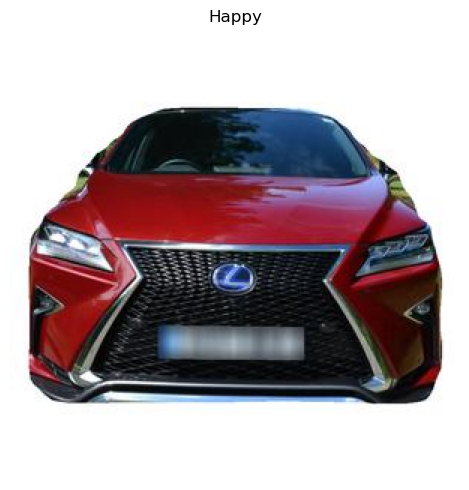

In [18]:
visualize_images([TEST_IMAGE_PATH,])

In [25]:
image_paths = [
    "data/images/confirmed_fronts/Lexus/2017/Lexus$$RX 450h$$2017$$Red$$48_24$$468$$image_1.jpg",
    "data/images/confirmed_fronts/Audi/2017/Audi$$Q5$$2017$$Black$$7_20$$1219$$image_5.jpg",
    "data/images/confirmed_fronts/Tesla/2017/Tesla$$Model X$$2017$$White$$90_2$$8$$image_0.jpg",
    "data/images/confirmed_fronts/Toyota/2017/Toyota$$RAV4$$2017$$Silver$$92_34$$164$$image_0.jpg",
    "data/images/confirmed_fronts/Subaru/2017/Subaru$$Outback$$2017$$Black$$86_7$$89$$image_4.jpg",
    "data/images/confirmed_fronts/Bentley/2017/Bentley$$Continental$$2017$$Grey$$10_5$$700$$image_5.jpg"
]

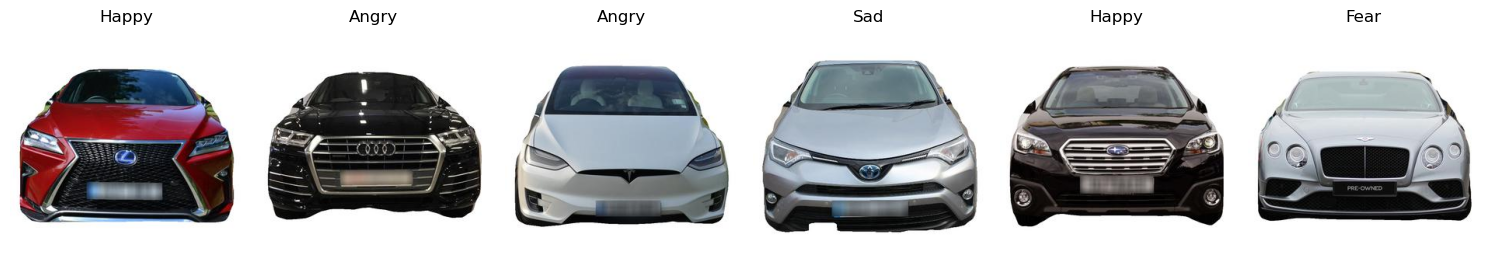

In [26]:
visualize_images(image_paths)